#### Matplotlib 객체 지향 인터페이스 1

##### plt.subplots() 사용하기

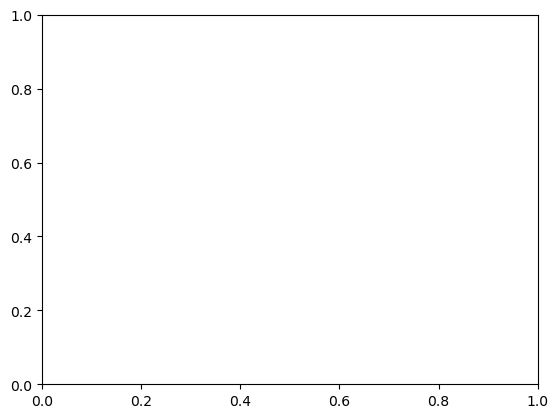

' \nsubplots() - > fig, ax 를 튜플 형태로 반환\n'

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.show()

''' 
subplots() - > fig, ax 를 튜플 형태로 반환
'''

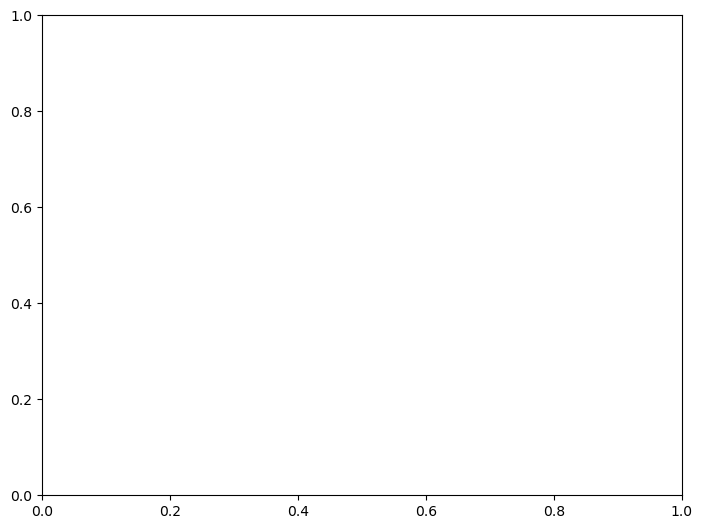

In [4]:
fig = plt.figure()             ## Figure 클래스의 인스턴스 반환

ax = fig.add_axes( [0,0,1,1])  ## fig에 axes 하나 추가
                               ## add_axes([left, bottom, width, height])의 형태

plt.show()

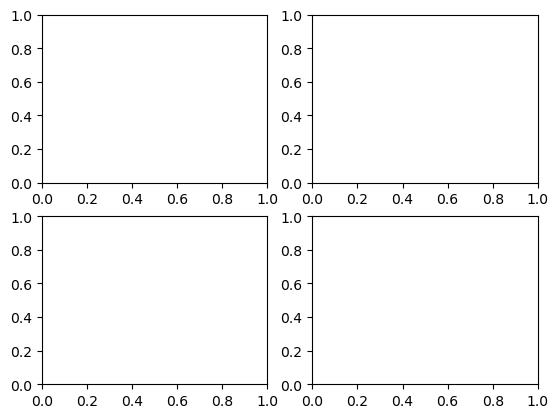

In [5]:
fig, ax = plt.subplots(2,2)
plt.show()

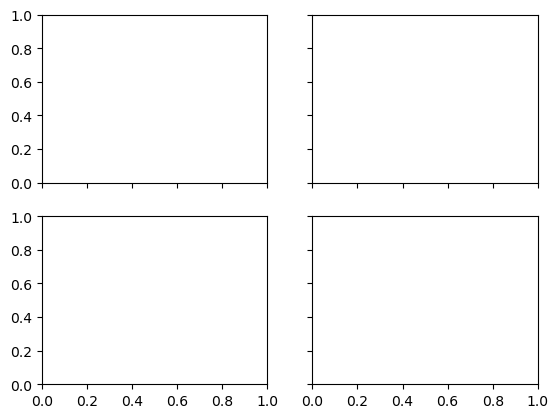

In [6]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
plt.show()

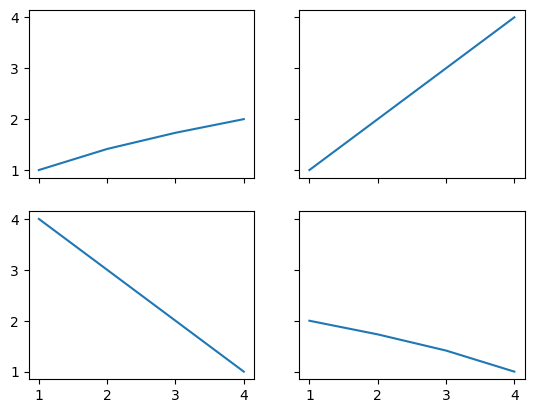

In [11]:
import numpy as np
x = np.arange(1, 5)     # [1, 2, 3, 4]

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, squeeze=True)
ax[0][0].plot(x, np.sqrt(x))      # left-top
ax[0][1].plot(x, x)               # right-top
ax[1][0].plot(x, -x+5)            # left-bottom
ax[1][1].plot(x, np.sqrt(-x+5))   # right-bottom

plt.show()


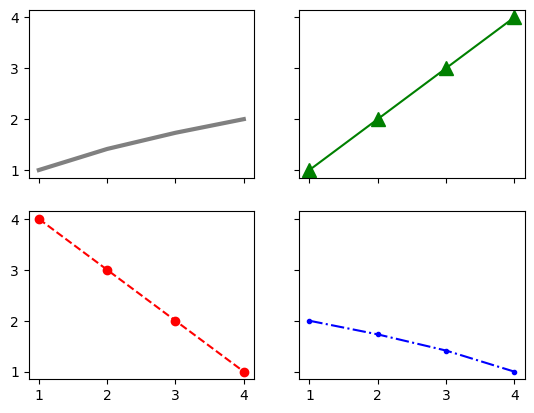

In [12]:

x = np.arange(1, 5)     # [1, 2, 3, 4]

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, squeeze=True)
ax[0][0].plot(x, np.sqrt(x), 'gray', linewidth=3)
ax[0][1].plot(x, x, 'g^-', markersize=10)
ax[1][0].plot(x, -x+5, 'ro--')
ax[1][1].plot(x, np.sqrt(-x+5), 'b.-.')

plt.show()


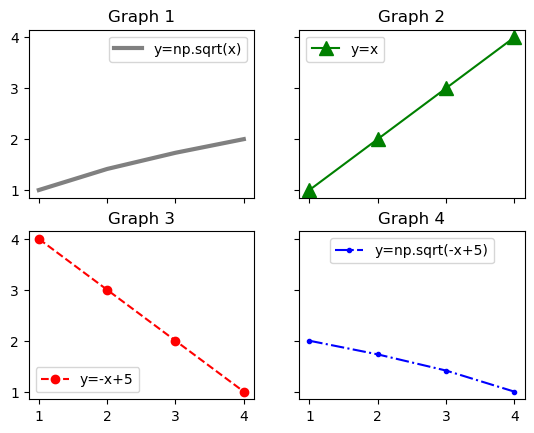

In [13]:

x = np.arange(1, 5)     # [1, 2, 3, 4]

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, squeeze=True)


ax[0][0].plot(x, np.sqrt(x), 'gray', linewidth=3, label='y=np.sqrt(x)')
ax[0][0].set_title('Graph 1')
ax[0][0].legend()

ax[0][1].plot(x, x, 'g^-', markersize=10, label='y=x')
ax[0][1].set_title('Graph 2')
ax[0][1].legend(loc='upper left')

ax[1][0].plot(x, -x+5, 'ro--', label='y=-x+5')
ax[1][0].set_title('Graph 3')
ax[1][0].legend(loc='lower left')

ax[1][1].plot(x, np.sqrt(-x+5), 'b.-.', label='y=np.sqrt(-x+5)')
ax[1][1].set_title('Graph 4')
ax[1][1].legend(loc='upper center')

plt.show()


##### Matplotlib 축 위치 조절

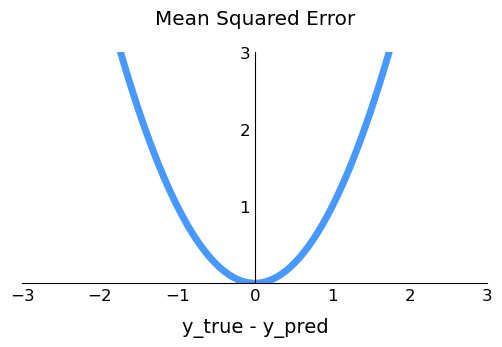

In [14]:

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12


fig, ax = plt.subplots()

ax.set_title('Mean Squared Error', pad=20)
ax.set_xlim(-3, 3)
ax.set_ylim(0, 3)
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])
ax.set_yticks([1, 2, 3])

ax.spines['left'].set_position('center')        # 왼쪽 축을 가운데 위치로 이동
ax.spines['right'].set_visible(False)          # 오른쪽 축을 보이지 않도록
ax.spines['top'].set_visible(False)            # 위 축을 보이지 않도록
ax.spines['bottom'].set_position(('data', 0))   # 아래 축을 데이터 0의 위치로 이동
ax.tick_params('both', length=0)                # Tick의 눈금 길이 0

x = np.linspace(-3, 3, 100)
ax.set_xlabel('y_true - y_pred', fontdict={'fontsize': 14}, labelpad=10)
ax.plot(x, x**2, color='#4799FF', linewidth=5)

plt.show()


#### Matplotlib 이중 Y축 표시하기

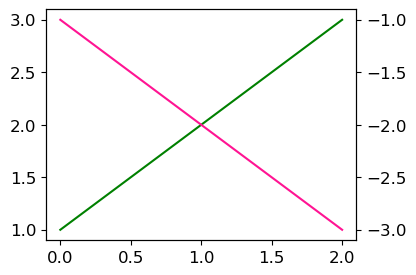

In [15]:

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

x = np.arange(0, 3)
y1 = x + 1
y2 = -x - 1

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()                 # ax1과 x축을 공유하는 새로운 Axes 객체 생성
ax2.plot(x, y2, color='deeppink')

plt.show()


##### 범례표시 ver.2

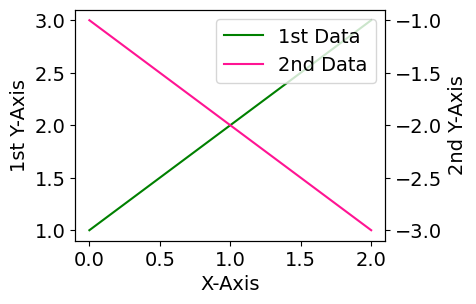

In [16]:

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 14

x = np.arange(0, 3)
y1 = x + 1
y2 = -x - 1

fig, ax1 = plt.subplots()
ax1.set_xlabel('X-Axis')
ax1.set_ylabel('1st Y-Axis')

line1 = ax1.plot(x, y1, color='green', label='1st Data')

ax2 = ax1.twinx()
ax2.set_ylabel('2nd Y-Axis')

line2 = ax2.plot(x, y2, color='deeppink', label='2nd Data')

# Point
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')
plt.show()


#### Matplotlib 두 종류의 그래프 그리기

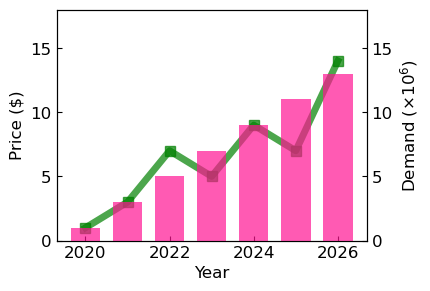

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
x = np.arange(2020, 2027)
y1 = np.array([1, 3, 7, 5, 9, 7, 14])
y2 = np.array([1, 3, 5, 7, 9, 11, 13])

# 3. 그래프 그리기
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='green', markersize=7, linewidth=5, alpha=0.7, label='Price')
ax1.set_ylim(0, 18)
ax1.set_xlabel('Year')
ax1.set_ylabel('Price ($)')
ax1.tick_params(axis='both', direction='in')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='deeppink', label='Demand', alpha=0.7, width=0.7)
ax2.set_ylim(0, 18)
ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')

plt.show()
